# Titanic Dataset Analysis

In [13]:
# import of libraries

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
!pip install openpyxl

In [15]:
# read the dataset
df = pd.read_csv('TITANIC.csv')

In [16]:
# check the information of the dataset
df.info() # View summary info (columns, data types, etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [17]:
# check the information of the dataset

df.head() # Check for the first 5 row of the dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
# check the dimensinality of the dataframe by printing the shape of the dataframe
print(df.shape)

(891, 15)


In [20]:
# check the descriptive statistics of the dataset

df.describe()     # View basic statistics

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Q1. What is the survival rate of passengers?

In [23]:
# Check for percentage of passenger that survive
survival_rate = df['survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")


Overall survival rate: 38.38%


### Q2. What is the gender distribution of passengers?

In [37]:
# Check for gender 
df.rename(columns={'sex': 'gender'}, inplace=True) # rename sex column to gender
gender_dist = df['gender'].value_counts() # check for gender counts
print("Gender distribution:\n",gender_dist) # view of the gender count

Gender distribution:
 gender
male      577
female    314
Name: count, dtype: int64


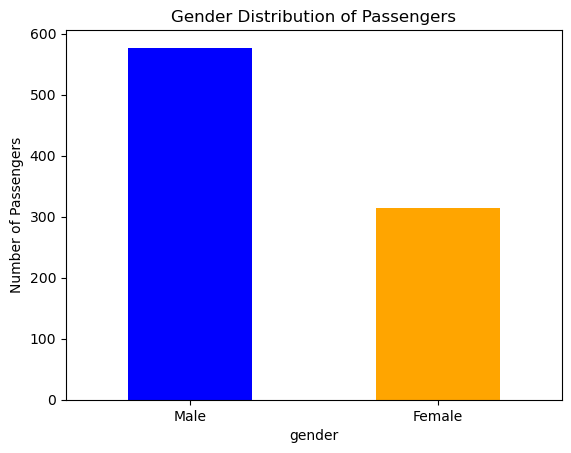

In [38]:
# Graphical view of the gender distribution

gender_dist.plot(kind='bar', color=['blue', 'orange'])

# Cuatomize labels and title
plt.xticks([0,1], ['Male', 'Female'], rotation =0)
plt.ylabel('Number of Passengers')
plt.title('Gender Distribution of Passengers')
plt.show()


In [ ]:
###Q3. How does survival rate differ by class?

Survival rate by class:
 pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


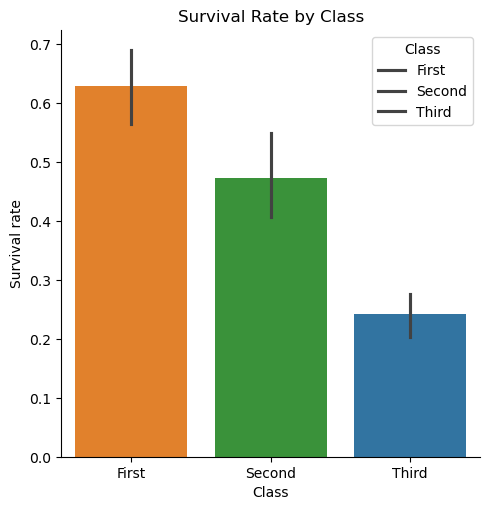

In [99]:
# Check for survival rate in each class
class_survival = df.groupby('pclass')['survived'].mean()
print("Survival rate by class:\n", class_survival)

# Visualization the survival rate in classes
sns.catplot(x='class', y='survived', data=df, order=['First','Second','Third'], hue='class',kind='bar')
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival rate')
plt.legend(title='Class', labels=['First', 'Second', 'Third'])
plt.show()


### Q4. What is the distribution of passenger ages?

In [66]:
Age = df['age'].dropna() # remove age rows without values
Age # view the output of age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64

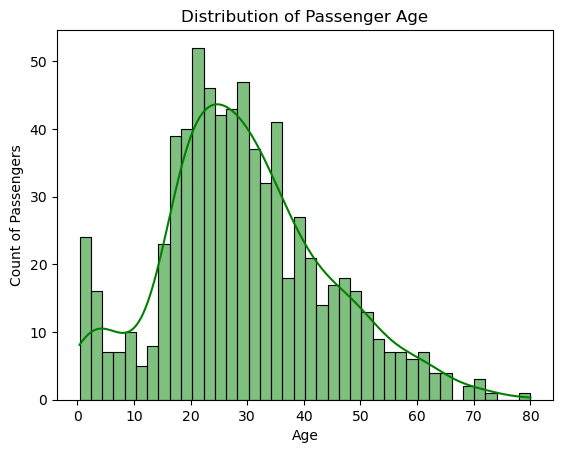

In [70]:
# visualization age distribution of the passengers

sns.histplot(df['age'].dropna(), color='green', bins=40, kde=True)
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()


### Q5. How many passengers embarked from each location?

In [103]:
# check for numbers of passenger that embarked at a particular location

embark_dist = df['embark_town'].value_counts()
print(f"Number of passenger that embarked at each location are: {embark_dist}")

Number of passenger that embarked at each location are: embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


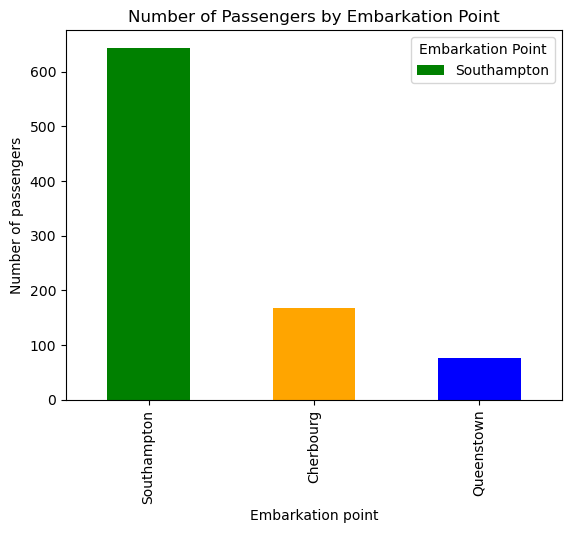

In [112]:
# Visualization of thenumbers of passenger that embarked at a particular location
embark_dist.plot(kind='bar',color=['green', 'orange', 'blue'])
plt.title('Number of Passengers by Embarkation Point')
plt.xlabel('Embarkation point')
plt.ylabel('Number of passengers')
plt.legend(title='Embarkation Point', labels=['Southampton','Cherbourg','Queenstown'])
plt.show()

### Q6. What ia the average fare paid per Class?

In [114]:
# Check for average amount paid by each class
fare_by_class =df.groupby('class')['fare'].mean()
print("Average Fare per Class:\n", fare_by_class)

Average Fare per Class:
 class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64


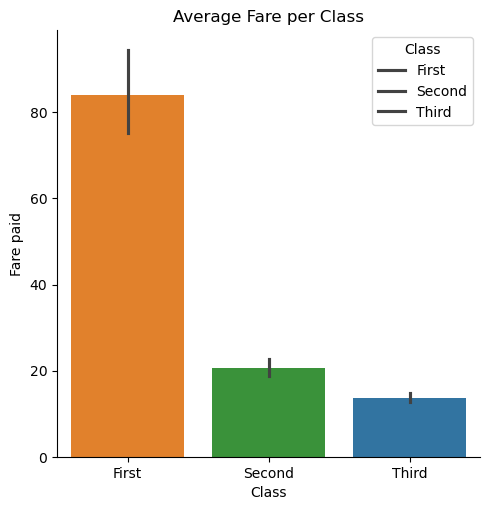

In [126]:
# Visualization of average amount paid by Class

sns.catplot(x='class', y='fare', hue='class', kind='bar', order=['First', 'Second', 'Third'], data=df)
plt.title('Average Fare per Class')
plt.xlabel('Class')
plt.ylabel('Fare paid')
plt.legend(title='Class', labels=['First', 'Second', 'Third'])
plt.show()

### Q7. How does gender affect survival rates

In [133]:
# check for survival rate of gender
gender_survival = df.groupby('gender')['survived'].mean()
print(f"Survival rate by gender:\n", gender_survival)

Survival rate by gender:
 gender
female    0.742038
male      0.188908
Name: survived, dtype: float64


### Q8. What is the correlation between fare and survival?

In [138]:
# Check for correlation between Fare and Survival
correlation = df['fare'].corr(df['survived'])
core= correlation *100
print("Correlation between fare and survival in percent is", core)

Correlation between fare and survival in percent is 25.730652238496234


### Q9. Number of siblings/spouses aboard vs survival

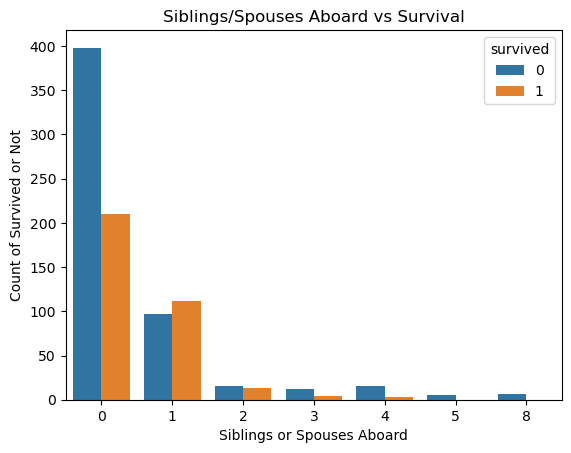

In [141]:
sns.countplot(x='sibsp', hue='survived', data=df)
plt.title('Siblings/Spouses Aboard vs Survival')
plt.xlabel('Siblings or Spouses Aboard')
plt.ylabel('Count of Survived or Not')
plt.show()

### Q10. What is the Age distribution by Class

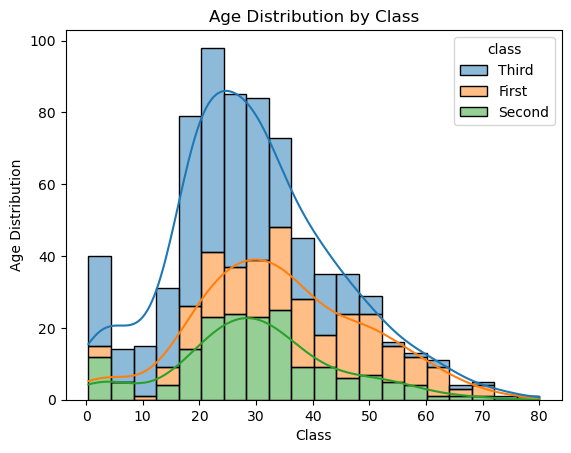

In [149]:
# Check for Class distribution by Age
sns.histplot(data=df, x='age', hue='class', multiple='stack', kde=True)
plt.title('Age Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Age Distribution')
plt.show()

### Q11. Survival rate by embarkation point

In [148]:
# Check for rate in each embarkation location

survival_by_embark = df.groupby('embarked')['survived'].mean()
sbe = survival_by_embark *100
print("Survival rate percent by embarkation point:\n", sbe)

Survival rate percent by embarkation point:
 embarked
C    55.357143
Q    38.961039
S    33.695652
Name: survived, dtype: float64
